In [1]:
#Function for reading pfm files 
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt

def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

(Text(0.5,1,'SSD 9'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

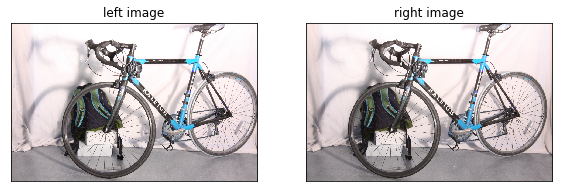

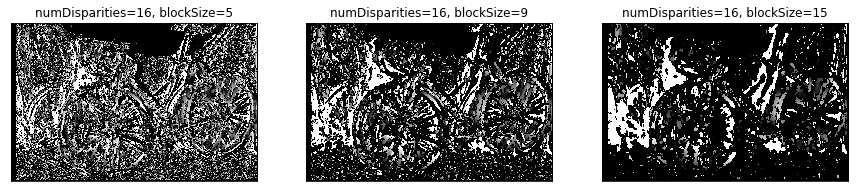

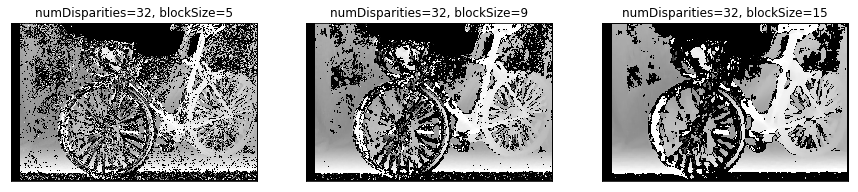

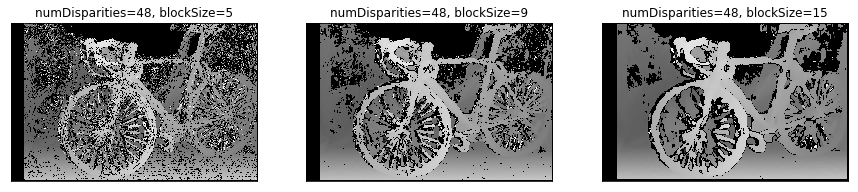

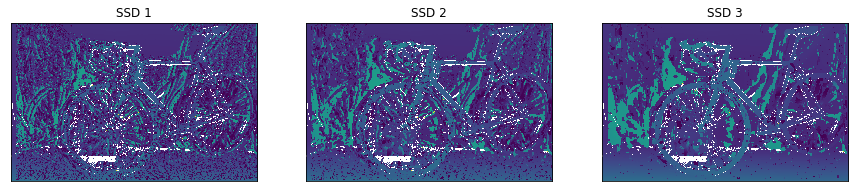

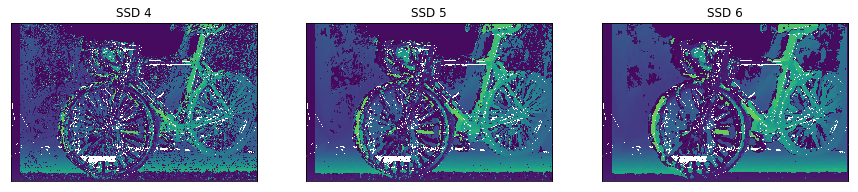

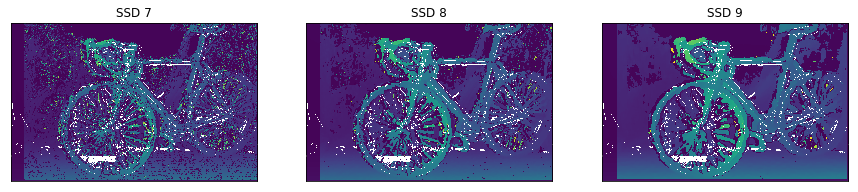

In [2]:
#2.1 Depth Estimation from stereo images 
import numpy as np
import cv2
import matplotlib.pyplot as plt


#2.12 Estimate depth 
# load left and right images
imgL = cv2.imread("im0.png");
imgR = cv2.imread("im1.png");


# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

#2.11 9 Depth maps 

# convert to grayscale
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# compute disparity map for 9 images
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)
stereo2 = cv2.StereoBM_create(numDisparities=16, blockSize=9)
stereo3 = cv2.StereoBM_create(numDisparities=16, blockSize=15)
stereo4 = cv2.StereoBM_create(numDisparities=32, blockSize=5)
stereo5 = cv2.StereoBM_create(numDisparities=32, blockSize=9)
stereo6 = cv2.StereoBM_create(numDisparities=32, blockSize=15)
stereo7 = cv2.StereoBM_create(numDisparities=48, blockSize=5)
stereo8 = cv2.StereoBM_create(numDisparities=48, blockSize=9)
stereo9 = cv2.StereoBM_create(numDisparities=48, blockSize=15)


disparity = stereo.compute(imgL_gray, imgR_gray)
disparity2 = stereo2.compute(imgL_gray, imgR_gray)
disparity3 = stereo3.compute(imgL_gray, imgR_gray)
disparity4 = stereo4.compute(imgL_gray, imgR_gray)
disparity5 = stereo5.compute(imgL_gray, imgR_gray)
disparity6 = stereo6.compute(imgL_gray, imgR_gray)
disparity7 = stereo7.compute(imgL_gray, imgR_gray)
disparity8 = stereo8.compute(imgL_gray, imgR_gray)
disparity9 = stereo9.compute(imgL_gray, imgR_gray)

#plot 9 depth images 
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(imgL)
plt.title("left image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgR)
plt.title("right image"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity, cmap="gray")
plt.title("numDisparities=16, blockSize=5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity2, cmap="gray")
plt.title("numDisparities=16, blockSize=9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity3, cmap="gray")
plt.title("numDisparities=16, blockSize=15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity4, cmap="gray")
plt.title("numDisparities=32, blockSize=5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity5, cmap="gray")
plt.title("numDisparities=32, blockSize=9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity6, cmap="gray")
plt.title("numDisparities=32, blockSize=15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity7, cmap="gray")
plt.title("numDisparities=48, blockSize=5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity8, cmap="gray")
plt.title("numDisparities=48, blockSize=9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity9, cmap="gray")
plt.title("numDisparities=48, blockSize=15"), plt.xticks([]), plt.yticks([])


#2.12, for each depth map compute pixel wise ssd with respect to ground truth 
disparity_array = []
disparity_array.append(disparity)
disparity_array.append(disparity2)
disparity_array.append(disparity3)
disparity_array.append(disparity4)
disparity_array.append(disparity5)
disparity_array.append(disparity6)
disparity_array.append(disparity7)
disparity_array.append(disparity8)
disparity_array.append(disparity9)

#initialize ssd array 
ssd = []

groundtruth = read_pfm("disp0.pfm")
#resize to match disparity images 
groundtruth = cv2.resize(groundtruth, (916,590))
#change all inf to 0
groundtruth[groundtruth==np.inf] = 0

#compute ssd for all images in disparity array  
for i in range(len(disparity_array)):
    
    pixeldiff = disparity_array[i] - groundtruth
    ssd.append((pixeldiff)*(pixeldiff))

#Plot 9 ssd images 


plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(ssd[0])
plt.title("SSD 1"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ssd[1])
plt.title("SSD 2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ssd[2])
plt.title("SSD 3"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(ssd[3])
plt.title("SSD 4"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ssd[4])
plt.title("SSD 5"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ssd[5])
plt.title("SSD 6"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(ssd[6])
plt.title("SSD 7"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ssd[7])
plt.title("SSD 8"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ssd[8])
plt.title("SSD 9"), plt.xticks([]), plt.yticks([])


1. Comment on the error-maps, for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths. 

Looking at the error maps, we can see that increasing the block size results in smoother error maps however with less detail, a smaller block size results in more detail and however more noise aswell. 

A lower number of disparities allows for less room to find the best disparity between two pixels, depth, is inversely proportaional to disparity. 

Specifically, the image with lowest number of disparities and lowest block size, i.e numDisparities=16, blockSize=5, has the most detail especially in regions of high texture, i.e the wheel of the bicyle. However, The edges of the bicyle in this error map are not as clear as it is the noisiest image out of the 9. Also, as it has the lowest numofDisparities(range), there is less option to find the best disparity, and thus results in unclear (small) depths. 

When keeping the block size set to either 5, 9, 15, but increasing numDisparities from 16 to 32 and 48 respectively, the images are still noisy and very detailed because of the small block size, however we can see that increasing numDisparities results in larger depths, allowing the bicycle edges to stand out more. This is because we increased the disparity range allowing to find the best disparity. 

Now, keeping number of disparities set to either 16, 32 or 48 but increasing the block size from 5 to 9 and 15 respectively we can see that there is progressively less noise in the images, however less details aswell. For example, the error image with numDisparities=32, blockSize=5 shows all the spokes of the bicyle's wheel however looking at the image with numDisparities=32, blockSize=9, we see less spokes and finally the image numDisparities=32, blockSize=15 we see the least spokes on the bicycle wheel. 

Finally, looking at the image with the highest number of disparities and the highest block size,i.e numDisparities=48, blockSize=15, we see as it has the highest block size, a much smoother but less detailed image. and because it has a highest num of disparities range, larger, clearer depths in the image allowing for edges to appear clearer.  

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#function for drawing lines 
""" drawlines """
def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epilines. Epilines corresponding to the points in 
    the first image are drawn on the second image.
    :param img1: image on which we draw the epilines for the points
            in img2
    :param lines: corresponding epilines
    """
    # img1 shape
    r, c = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        # pick a random color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

#2.2 Epipolar Geometry 
#2.1 compute matching SIFT keypoints from a stereo image pair

#load image pairs
imgL = cv2.imread("im0.png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("im1.png", cv2.IMREAD_GRAYSCALE)

# we need to find as many possible matches between two images to find
# the fundamental matrix
sift = cv2.xfeatures2d.SIFT_create()
# create a Brute-Force Matcher
bfMatcher = cv2.BFMatcher(cv2.NORM_L2)

#find keypoints and descriptors with SIFT
kpL, desL = sift.detectAndCompute(imgL, None)
kpR, desR = sift.detectAndCompute(imgR, None)

# match descriptors (find the best two matches for each descriptor)
matches = bfMatcher.knnMatch(desL, desR, k=2)

# ratio test - store the list of best matches from both images
good = []
ptsL = []
ptsR = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.6 * n.distance:
        good.append(m)
        ptsR.append(kpR[m.trainIdx].pt)
        ptsL.append(kpL[m.queryIdx].pt)

# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# find epilines
# Epilines corresponding to points in the first image is drawn on the
# second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)

# draw lines
imgL1, imgR1 = drawlines(imgL, imgR, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 2, F)